In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from keras.models import Sequential
from keras.models import load_model
from keras.layers import LSTM,Dense
from keras.metrics import MeanSquaredError,MeanAbsoluteError

In [2]:
df=pd.read_csv('MSFT.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-04-03,65.809998,65.940002,65.190002,65.550003,61.316456,20400900
1,2017-04-04,65.389999,65.809998,65.279999,65.730003,61.484829,12997400
2,2017-04-05,66.300003,66.349998,65.440002,65.559998,61.325806,21448600
3,2017-04-06,65.599998,66.059998,65.480003,65.730003,61.484829,18103500
4,2017-04-07,65.849998,65.959999,65.440002,65.680000,61.438046,14108500
...,...,...,...,...,...,...,...
1022,2021-04-26,261.660004,262.440002,260.170013,261.549988,259.973236,19763300
1023,2021-04-27,261.579987,263.190002,260.119995,261.970001,260.390686,31014200
1024,2021-04-28,256.079987,256.540009,252.949997,254.559998,253.025360,46903100
1025,2021-04-29,255.460007,256.100006,249.000000,252.509995,250.987717,40589000


In [3]:
#choose close data
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']
df=df['Close']

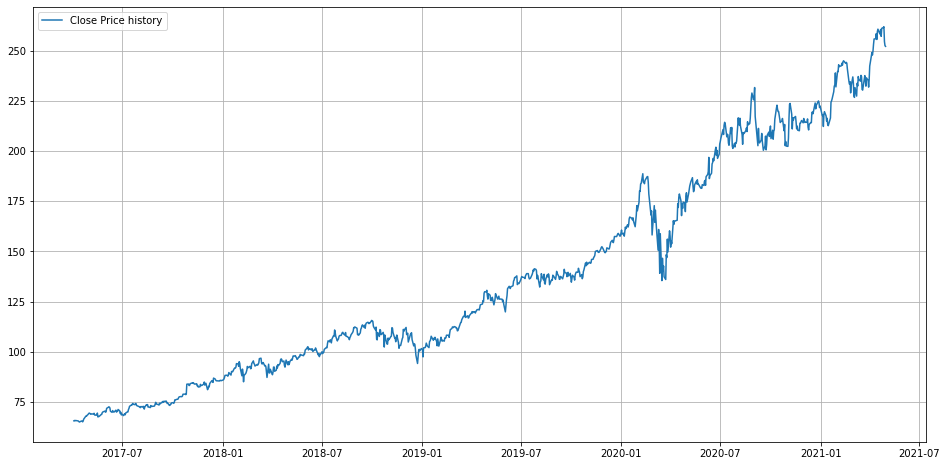

In [4]:
#plot
plt.figure(figsize=(16,8))
plt.plot(df, label='Close Price history')
plt.legend()
plt.grid()
plt.savefig('.\\images\\price.jpg')

In [5]:
#data normalization
data=df.values.reshape(df.shape[0],1)
sca=MinMaxScaler()
data=sca.fit_transform(data)
data

array([[0.00304541],
       [0.00395902],
       [0.00309614],
       ...,
       [0.96238959],
       [0.95198454],
       [0.95030957]])

In [6]:
#split x and y
x=[]
y=[]
for i in range(30,len(data)):
    x.append(data[i-30:i,0])
    y.append(data[i,0])
x=np.array(x)
y=np.array(y)

In [7]:
print(x.shape)
print(y.shape)

(997, 30)
(997,)


In [11]:
#split train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=3)

In [9]:
#build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(30,1)))
model.add(LSTM(units=50))
model.add(Dense(1))

In [10]:
#train
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
747/747 - 10s - loss: 0.0026 - 10s/epoch - 13ms/step
Epoch 2/20
747/747 - 7s - loss: 0.0012 - 7s/epoch - 10ms/step
Epoch 3/20
747/747 - 7s - loss: 0.0010 - 7s/epoch - 10ms/step
Epoch 4/20
747/747 - 7s - loss: 8.0938e-04 - 7s/epoch - 10ms/step
Epoch 5/20
747/747 - 7s - loss: 6.1016e-04 - 7s/epoch - 10ms/step
Epoch 6/20
747/747 - 7s - loss: 6.4194e-04 - 7s/epoch - 10ms/step
Epoch 7/20
747/747 - 7s - loss: 5.4099e-04 - 7s/epoch - 10ms/step
Epoch 8/20
747/747 - 7s - loss: 7.8327e-04 - 7s/epoch - 10ms/step
Epoch 9/20
747/747 - 7s - loss: 4.7631e-04 - 7s/epoch - 10ms/step
Epoch 10/20
747/747 - 7s - loss: 4.3245e-04 - 7s/epoch - 10ms/step
Epoch 11/20
747/747 - 7s - loss: 4.7632e-04 - 7s/epoch - 10ms/step
Epoch 12/20
747/747 - 8s - loss: 4.3178e-04 - 8s/epoch - 10ms/step
Epoch 13/20
747/747 - 8s - loss: 4.1865e-04 - 8s/epoch - 10ms/step
Epoch 14/20
747/747 - 8s - loss: 5.0180e-04 - 8s/epoch - 11ms/step
Epoch 15/20
747/747 - 8s - loss: 3.6507e-04 - 8s/epoch - 10ms/step
Epoch 16/20
74

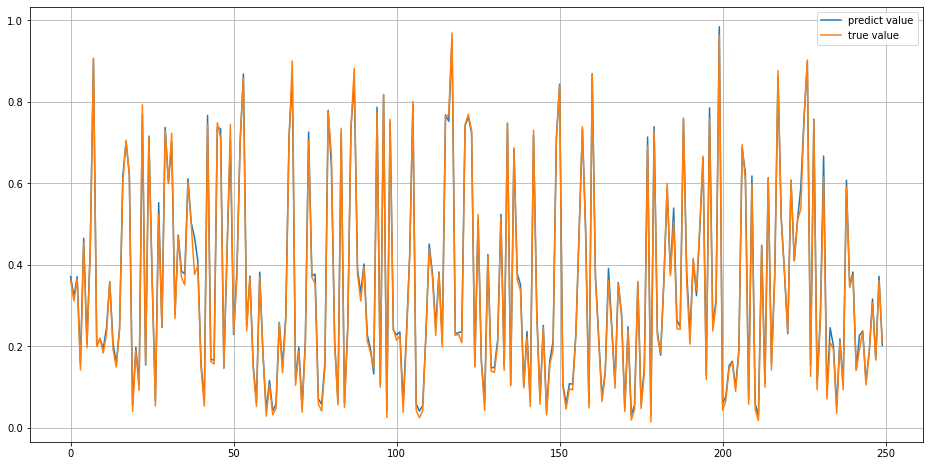

In [11]:
#test
y_predict=model.predict(x_test)

plt.figure(figsize=(16,8))
plt.plot(y_predict,label='predict value')
plt.plot(y_test,label='true value')

plt.legend()
plt.grid()

In [12]:
#model=load_model('model1.h5')
y_predict=model.predict(x_test)

In [13]:
#mse
m = MeanSquaredError()
m.update_state(y_predict,y_test)
m.result().numpy()

0.00022229318

In [14]:
#mae
a=MeanAbsoluteError()
a.update_state(y_predict,y_test)
a.result().numpy()

0.011218533

In [15]:
#r2
r=r2_score(y_predict,y_test)
r

0.996462710229461

In [16]:
#residual
residual=np.ravel(y_predict)-y_test
print(np.mean(residual))
print(np.median(residual))
print(skew(residual))

0.00745473645639221
0.008401451476999722
0.6927680603286904


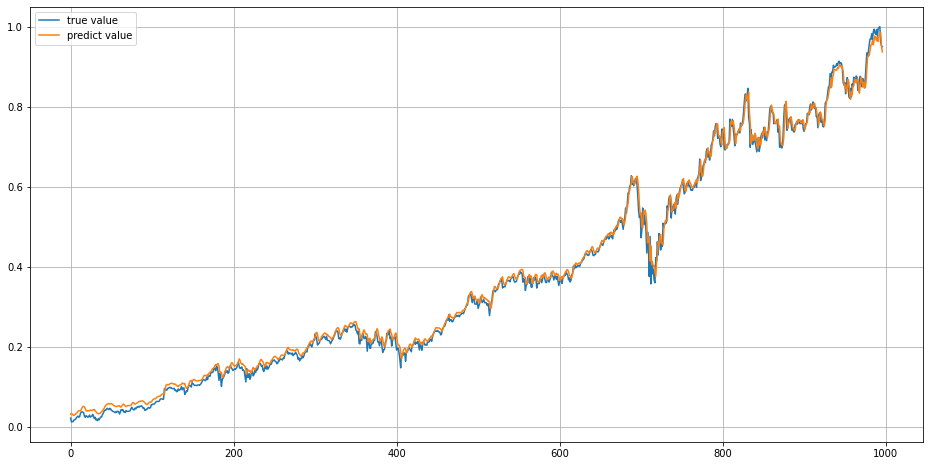

In [17]:
#predict all data
predict_all=model.predict(x)

plt.figure(figsize=(16,8))
plt.plot(y,label='true value')
plt.plot(predict_all,label='predict value')
plt.legend()
plt.grid()

In [19]:
model.save('model1_new.h5')

In [8]:
May=pd.read_csv('MSFT_21May.csv')
y_May=May['Close'].values.reshape(May.shape[0],1)

In [9]:
model=load_model('model1_new.h5')

In [10]:
predict_May=[]
ans=x[-1:]
cur=y[-1]
for _ in range(len(y_May)):
    ans[0]=np.hstack((ans[0][1:],cur))
    cur=model.predict(ans)[0][0]
    predict_May.append(cur)
predict_May=np.array(predict_May) 

In [11]:
#predict May
#x_May=x[-y_May.shape[0]:]
#predict_May=model.predict(x_May)
predict_May=sca.inverse_transform(predict_May)

plt.figure(figsize=(16,8))
plt.plot(y_May,label='true value')
plt.plot(predict_May,label='predict value')
plt.legend()
plt.grid()

ValueError: Expected 2D array, got 1D array instead:
array=[0.9358151  0.9271529  0.919497   0.9128471  0.9071281  0.90217626
 0.897821   0.89391434 0.8903389  0.88700694 0.88385814 0.8808528
 0.8779703  0.8751974  0.87252754 0.86995745 0.86748636 0.8651121
 0.862835   0.8606518 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [19]:
a=MeanAbsoluteError()
a.update_state(predict_May,y_May)
a.result().numpy()

7.963805

In [18]:
m = MeanSquaredError()
m.update_state(predict_May,y_May)
m.result().numpy()

83.89852